In [41]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
import copy

import sys
sys.path.insert(0, "../models/")
from relu_nn import FFReLUNet

In [2]:
# Make the graph
N = 5
G = nx.erdos_renyi_graph(N, 0.6)
nx.is_connected(G)

True

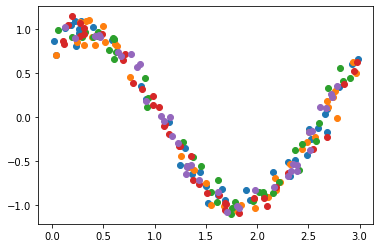

In [3]:
# Setup data
xdom = [0.0, 3.0]
num_samps = 40
freq = 2.0
phase = 1.0
amp = 1.0
noise = 0.1

fig, ax = plt.subplots()
dataset = {}
for i in range(N):
    x = (xdom[1] - xdom[0]) * torch.rand(num_samps) + xdom[0]
    y = amp * torch.sin(freq * x + phase) + noise * torch.randn(num_samps)
    dataset[i] = {"x": x.reshape(-1, 1), "y": y.reshape(-1, 1)}
    ax.scatter(x, y)

plt.show()

In [42]:
# Setup models
shape = [1, 16, 16, 1]
base_model = FFReLUNet(shape)

models = {i : copy.deepcopy(base_model) for i in range(N)}

In [38]:
# Setup loss functions
def cadmm_loss(base_loss, pred, target, model, dual, thj, rho):
    th = torch.nn.utils.parameters_to_vector(model.parameters())
    reg = torch.sum(torch.square(torch.cdist(th.reshape(1, -1), thj.reshape(1, -1))))
    return base_loss(pred, target) + torch.dot(th, dual) + rho * reg

loss_fun = torch.nn.MSELoss()

In [ ]:
def primal_update(data, model, loss_fun, dual, thj, rho, lr, max_its):
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    
    for k in range(max_its):
        opt.zero_grad()

        yh = model.forward()



In [ ]:
max_its_cadmm = 30
max_its_adam = 20
